# Sieve of Randall

## Introduction

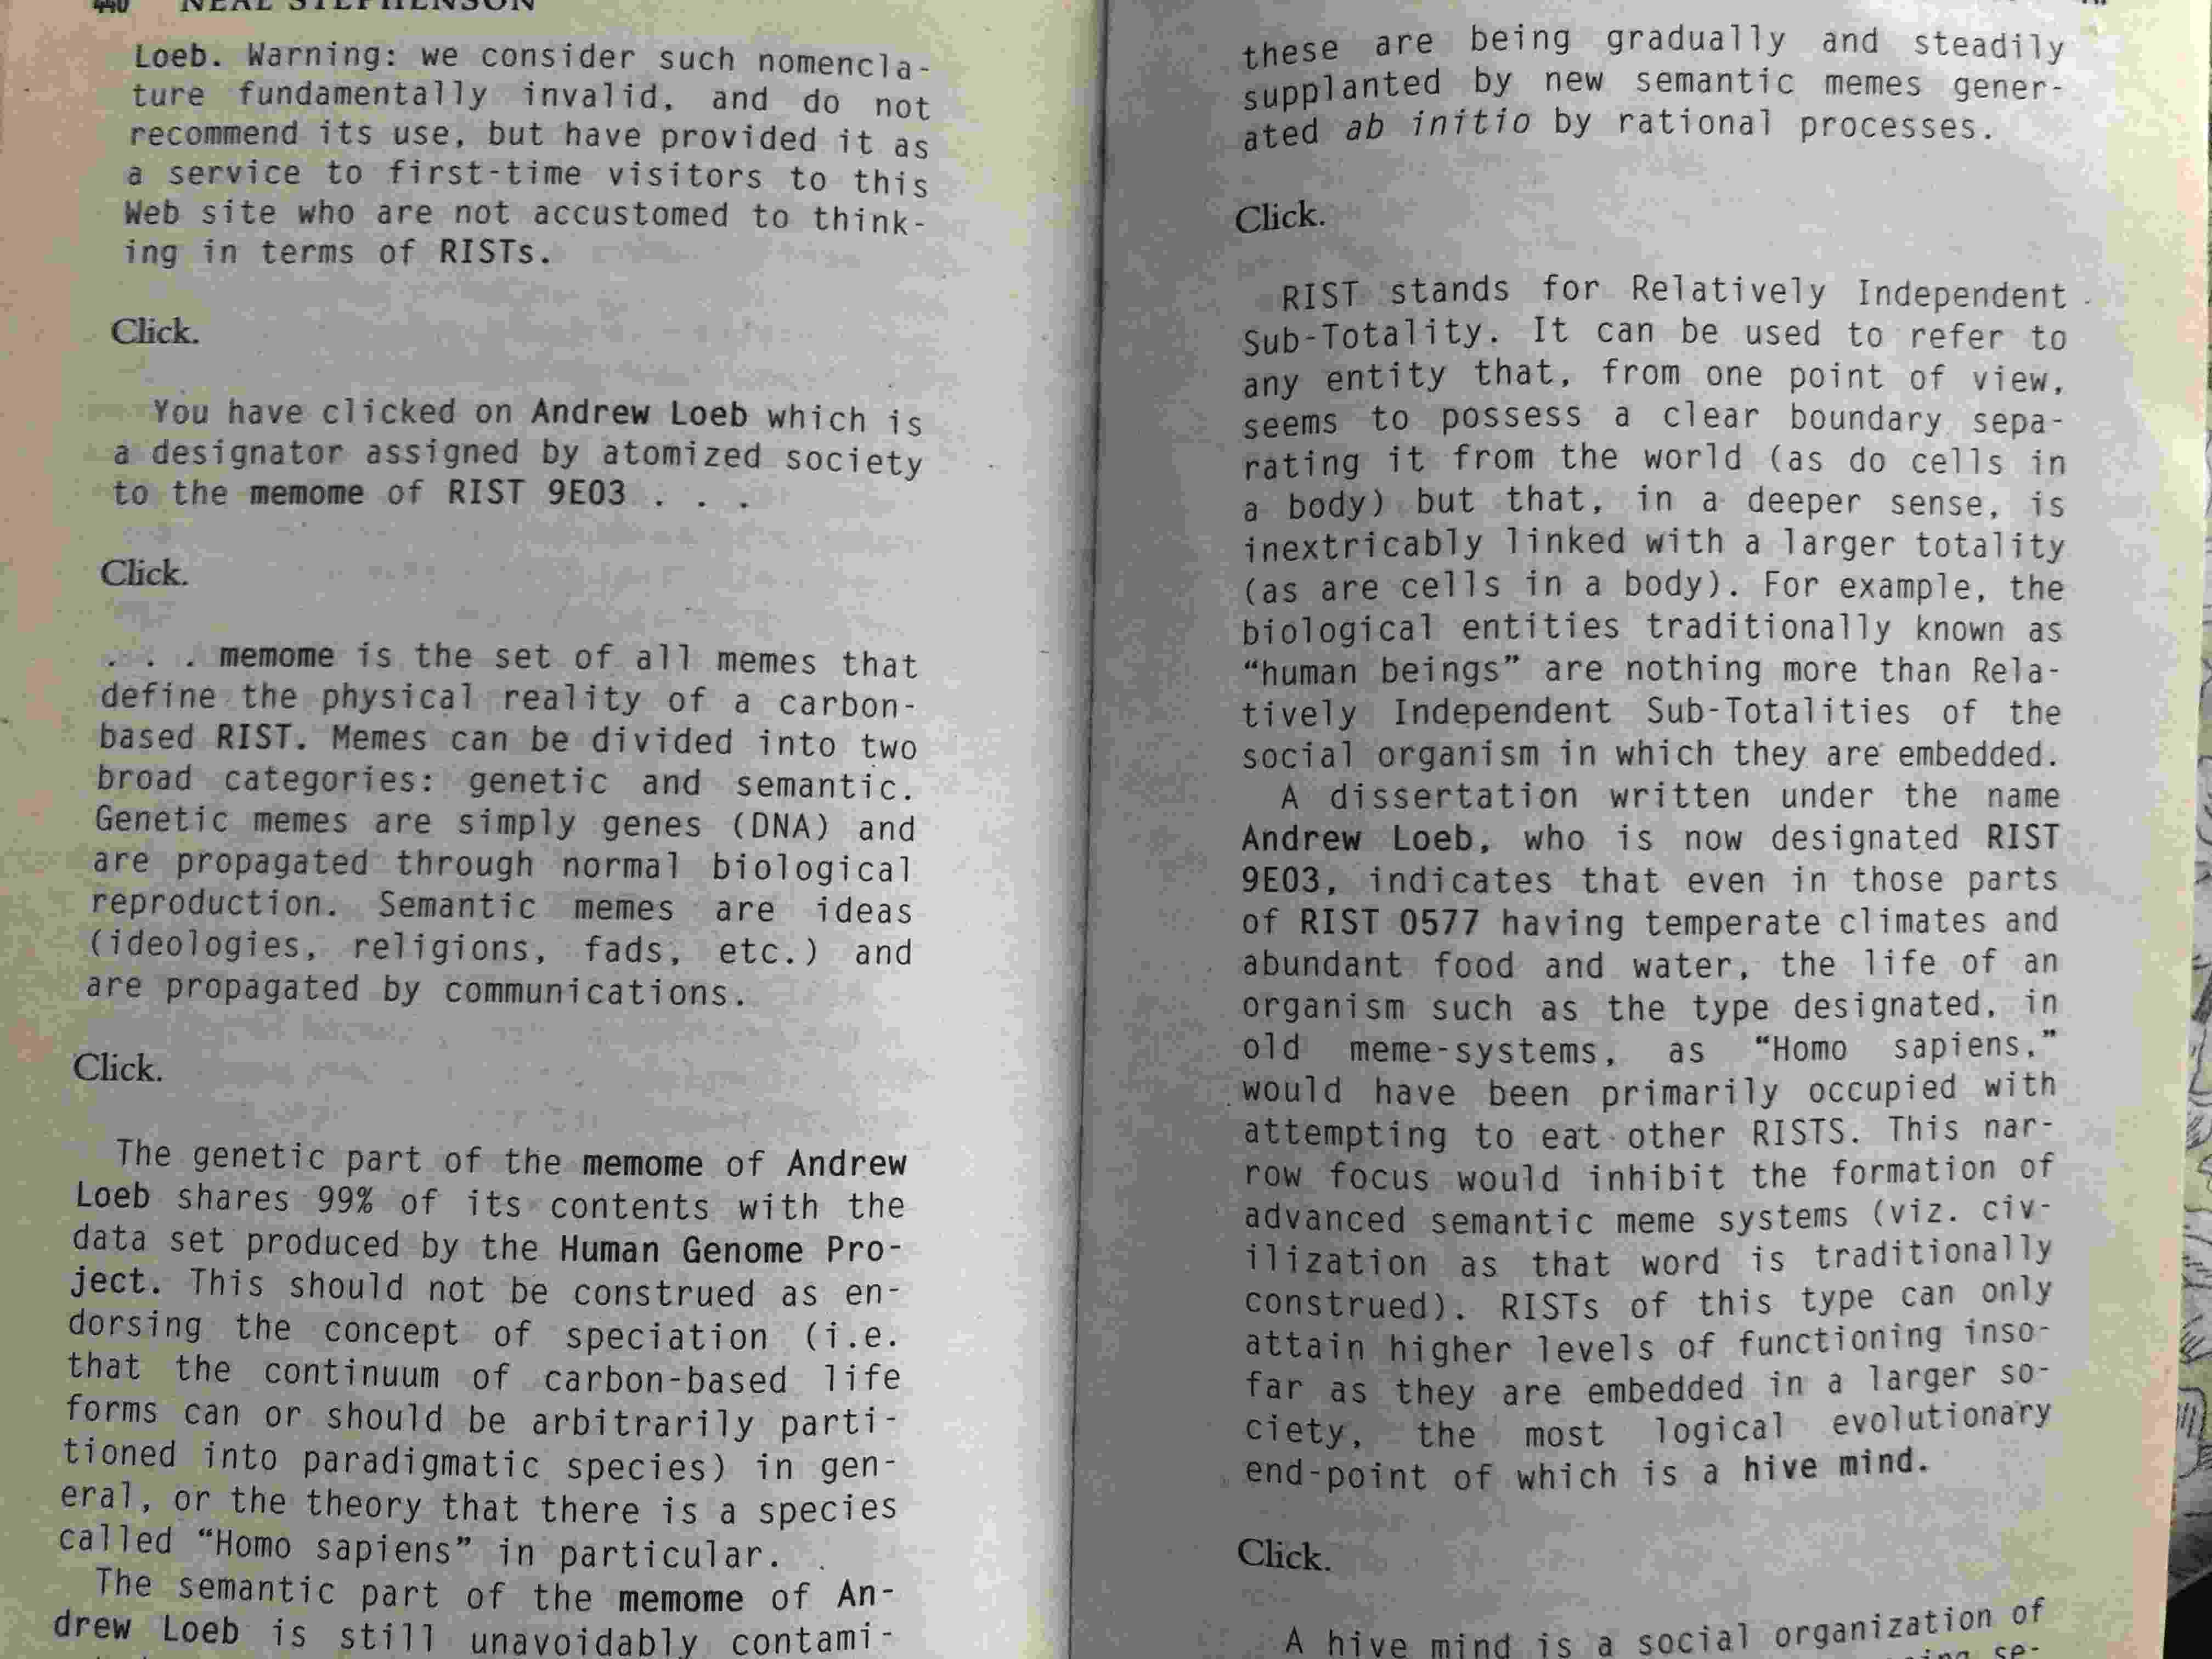

In [72]:
from IPython.display import Image
Image("./img/crypto.jpg")

## Abstract

Last time I spoke with Randall, he was quite interested in a particular type of machines that
initially were designed to solve a problem and while doing so they were catalyzing its own
construction. He was pretty convinced that, as long as enough energy was around, **all** solutions
to solvable problems can be found in that way. I couldn't find flaws in his logic, and we pursued an
exploration.

In fact, he pointed out that the machine will create (or better said, discover) new problems
on it’s way and solve them with the sole purpose of collecting and storing energy. And again,
he cleverly made a guess that different components of the machine will establish a symbiotic
relation to parallelize the resolution of the problems and to reuse previous solutions when
necessary.

That’s how the concept of RIST was born, which was the most natural way to study the behavior
of different parts of the machine over time. Something overlooked back then was the possibility
that the machine became aware of itself, in the sense that a RIST will develop enough
computing power to formulate a question about its nature of existence.

Randall once joked about that. “ZP! What if the machine now knows that something exists?
Is that a *bug*?”. And yes, consciousness was initially treated as a bug and it was used as
a stopping criteria for whatever problem was being solved.

But as a good friend of mine always says, a bug, it’s a feature. So we opened a new branch where
we let consciousness develop freely in the machine whenever it was possible.

Among other things, we found that the development of consciousness was quite different on
each iteration, depending on the initial problem. But regardless of that genesis trigger,
we found a set of problems that appeared over and over on every conscious instance of
the machine that we created. We didn’t probe it, but we had a good intuition that the
discovery of those problems is a necessary condition for consciousness to exist.

Since we were skipping our arts class at that time, we couldn’t think of a more creative name
than “Necessary Problems” for them. It was later changed to “Natural Problems” because no one
worked on a proof for that yet. Not even the [machine](https://www.youtube.com/watch?v=fn1R-5p_j5c) $\zeta$.

And here it is Randy, look at what you did !

## Prime Sieve Automata (PSA)

### Handcrafting the logic

Let's consider a language with an alphabet of "1" and "0" where natural numbers are expressed in the
base-2 numeral system. For example, 2 it's represented as "10" and 11 as "1011". The automata
we'll build is going to read the strings starting at the right most bit (least significant bit)
of the string.

In general, the following function converts a natural number into the binary
representation we'll work with.

In [73]:
def get_binary_input(number):
    binary = "{0:0128b}".format(number)
    stack = [c for c in binary[binary.find('1'):][::-1]]

    return stack

for i in range(1, 12):
    print("[+] binary stack for n =", i, get_binary_input(i))

[+] binary stack for n = 1 ['1']
[+] binary stack for n = 2 ['0', '1']
[+] binary stack for n = 3 ['1', '1']
[+] binary stack for n = 4 ['0', '0', '1']
[+] binary stack for n = 5 ['1', '0', '1']
[+] binary stack for n = 6 ['0', '1', '1']
[+] binary stack for n = 7 ['1', '1', '1']
[+] binary stack for n = 8 ['0', '0', '0', '1']
[+] binary stack for n = 9 ['1', '0', '0', '1']
[+] binary stack for n = 10 ['0', '1', '0', '1']
[+] binary stack for n = 11 ['1', '1', '0', '1']


Now let's build a finite automata which is going to accept binary strings of prime numbers until 11.
A straightforward way would be to create a single final state ($ ip_0 $) and connect the
sequence of ones and zeroes from the initial state ($ is_0 $) for each prime.

[+] the eleven prime sieve
states = {z3, z5, z2, ip0, z8, z0, z7, z1, z4, z6, is0} ; alphabet = {'1', '0'}
is0 (0) -> {z0}
is0 (1) -> {z4, z1, z2, z6}
z0 (1) -> {ip0}
z1 (1) -> {ip0}
z2 (0) -> {z3}
z3 (1) -> {ip0}
z4 (1) -> {z5}
z5 (1) -> {ip0}
z6 (1) -> {z7}
z7 (0) -> {z8}
z8 (1) -> {ip0}
initial = is0 ; final = {ip0}

[+] automata plotter


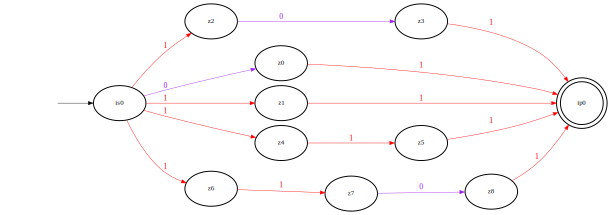

In [74]:
from zephod.finite import *

initial, final = State("is0"), State("ip0")

delta = FADelta()

# number 2
delta.add(initial, State("z0"), {"0"})
delta.add(State("z0"), final, {"1"})

# number 3
delta.add(initial, State("z1"), {"1"})
delta.add(State("z1"), final, {"1"})

# number 5
delta.add(initial, State("z2"), {"1"})
delta.add(State("z2"), State("z3"), {"0"})
delta.add(State("z3"), final, {"1"})

# number 7
delta.add(initial, State("z4"), {"1"})
delta.add(State("z4"), State("z5"), {"1"})
delta.add(State("z5"), final, {"1"})

# number 11
delta.add(initial, State("z6"), {"1"})
delta.add(State("z6"), State("z7"), {"1"})
delta.add(State("z7"), State("z8"), {"0"})
delta.add(State("z8"), final, {"1"})

eleven_sieve = FiniteAutomata(transition=delta, initial=initial, final={final})

print("[+] the eleven prime sieve")
print(eleven_sieve)

from utils.plotter import *

print("\n[+] automata plotter")

graphviz.Source(eleven_sieve.build_dot())

The resulting automata is a non deterministic (NFDA). We can use a prime sieve to verify that the it
works as expected.

In [75]:
from sympy import sieve

for i in range(2, 12):
    accepted = eleven_sieve.read(get_binary_input(i))
    if i in sieve:
        print("[+] checking prime number n =", i, "accepted =", accepted)
        assert accepted
    else:
        print("[+] checking composite number n =", i, "accepted =", accepted)
        assert not accepted

[+] checking prime number n = 2 accepted = True
[+] checking prime number n = 3 accepted = True
[+] checking composite number n = 4 accepted = False
[+] checking prime number n = 5 accepted = True
[+] checking composite number n = 6 accepted = False
[+] checking prime number n = 7 accepted = True
[+] checking composite number n = 8 accepted = False
[+] checking composite number n = 9 accepted = False
[+] checking composite number n = 10 accepted = False
[+] checking prime number n = 11 accepted = True


Given the construction method, this automata is performing a linear search into the
prime numbers that are encoded on its transition function. It will try each one of the 4 branches
that are coming out from $is_0$ until it gets to the final state, or until it rejects
the string for composite numbers.

You can also debug the evolution of the automata for a given string, along with the different paths
that is taking when is non deterministic.

In [76]:
eleven_sieve.debug(get_binary_input(11))

-------------------------------------------------------------------------------

initial (is0)         final {ip0}                                                                                       

[C0] 1 1 0 1               is0                           

-------------------------------------------------------------------------------
[C0] 1 1 0 1               [is0, 1(0)] to [z6, 1(1)]     
[C0] 1 1 0 1               [is0, 1(0)] to [z4, 1(1)]     
[C0] 1 1 0 1               [is0, 1(0)] to [z2, 1(1)]     
[C0] 1 1 0 1               [is0, 1(0)] to [z1, 1(1)]     
-------------------------------------------------------------------------------
[C0] 1 1 0 1               [z4, 1(1)] to [z5, 0(2)]      
[C0] 1 1 0 1               [z1, 1(1)] to [ip0, 0(2)]     
[C0] 1 1 0 1               [z6, 1(1)] to [z7, 0(2)]      
-------------------------------------------------------------------------------
[C0] 1 1 0 1               [z7, 0(2)] to [z8, 1(3)]      
----------------------------------

As a first step, we can convert this NFDA into a deterministic one, which is going to result in a
DFA where each state will have at most 2 transitions.


[+] deterministic FA eleven sieve


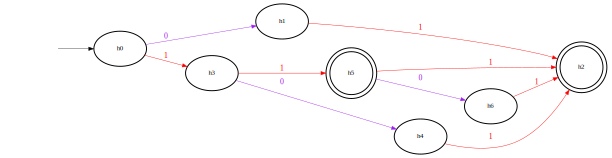

In [77]:
print("\n[+] deterministic FA eleven sieve")

deterministic_eleven_sieve = eleven_sieve.get_deterministic()
graphviz.Source(deterministic_eleven_sieve.build_dot())

Much better and cleaner. We can further minimize the automata to reduce the number of states.


[+] deterministic FA eleven sieve


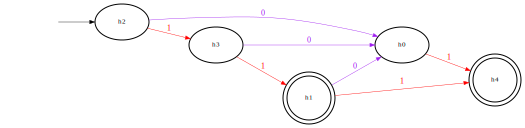

In [78]:
print("\n[+] deterministic FA eleven sieve")

minimal_eleven_sieve = deterministic_eleven_sieve.minimal()
graphviz.Source(minimal_eleven_sieve.build_dot())

In [79]:
for i in range(2, 12):
    accepted = minimal_eleven_sieve.read(get_binary_input(i))
    if i in sieve:
        print("[+] checking prime number (minimal DFA) n =", i, "accepted =", accepted)
        assert accepted
    else:
        print("[+] checking composite number (minimal DFA) n =", i, "accepted =", accepted)
        assert not accepted

[+] checking prime number (minimal DFA) n = 2 accepted = True
[+] checking prime number (minimal DFA) n = 3 accepted = True
[+] checking composite number (minimal DFA) n = 4 accepted = False
[+] checking prime number (minimal DFA) n = 5 accepted = True
[+] checking composite number (minimal DFA) n = 6 accepted = False
[+] checking prime number (minimal DFA) n = 7 accepted = True
[+] checking composite number (minimal DFA) n = 8 accepted = False
[+] checking composite number (minimal DFA) n = 9 accepted = False
[+] checking composite number (minimal DFA) n = 10 accepted = False
[+] checking prime number (minimal DFA) n = 11 accepted = True


It's also possible to get a grammar out of the FDA, which is going to generate the prime
numbers we encoded.

In [80]:
from utils.language.grammar import *

eleven_sieve_grammar = Grammar.build_from_finite_automata(minimal_eleven_sieve)

print("[+] eleven sieve grammar")
print(eleven_sieve_grammar)

print("\n[+] prime generation")
for each in eleven_sieve_grammar.enumerate(length=4):
    print("[+] number generated", int(each[::-1], 2))

[+] eleven sieve grammar
T = {'1', '0'} ; N = {'R', 'P', 'Q'}
S -> 1P
S -> 0Q
R -> 1
R -> 0Q
Q -> 1
P -> 1
P -> 1R
P -> 0Q

[+] prime generation
[+] number generated 3
[+] number generated 7
[+] number generated 5
[+] number generated 11
[+] number generated 2


### Moving it forward

What if we keep applying this process for larger numbers? In fact, we could keep reusing previous
minimized DFAs iteratively while adding new primes to its structure.

Let's do it for all natural numbers up to $2^7$. We can automate the construction of the
automata with the following methods using our external sieve to find prime numbers.


[+] seven bit NFDA  sieve


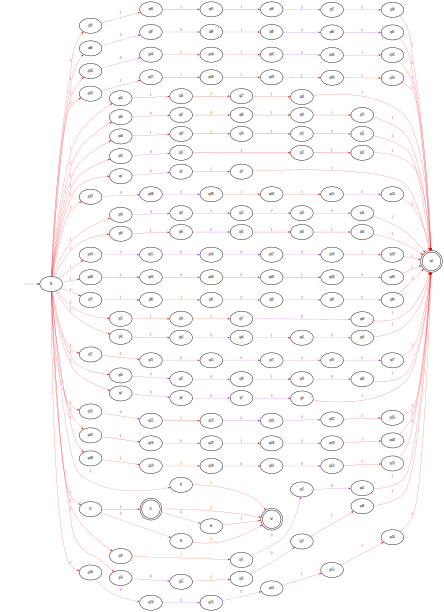

In [81]:
class PrimeBuilder:
    def __init__(self, final_state):
        self.counter = 0
        self.final_state = final_state

    def get_new_state(self):
        self.counter += 1
        return State("zp" + str(self.counter))

    def state_factorization(self, initial_state, transition, n):
        if n in sieve:
            stack, state = get_binary_input(n), initial_state
            for ic, b in enumerate(stack):
                current_state = self.get_new_state()

                if ic == 0:
                    transition.add(state, current_state, b)
                elif ic == len(stack) - 1:
                    transition.add(state, self.final_state, b)
                else:
                    transition.add(state, current_state, b)

                state = current_state

    def build(self, initial_state, transition, lower, higher):
        for lm in range(lower, higher):
            self.state_factorization(initial_state, transition, lm)

# get initial state from the previous automata
initial = deterministic_eleven_sieve.initial
final = deterministic_eleven_sieve.final.copy()

prime_state = State("ip0")
final.add(prime_state)

delta = copy.deepcopy(deterministic_eleven_sieve.transition)

prime_builder = PrimeBuilder(final_state=prime_state)

# add number from 11 to 64 (7 bits)
prime_builder.build(initial, delta, 12, 129)

# build the new automata with the additional primes
nfda_seven_sieve = FiniteAutomata(transition=delta, initial=initial, final=final)

print("\n[+] seven bit NFDA  sieve")

graphviz.Source(nfda_seven_sieve.build_dot())

Now we can apply a NFDA to an DFA conversion, followed by a minimization.


[+] deterministic DFA 7 bits sieve


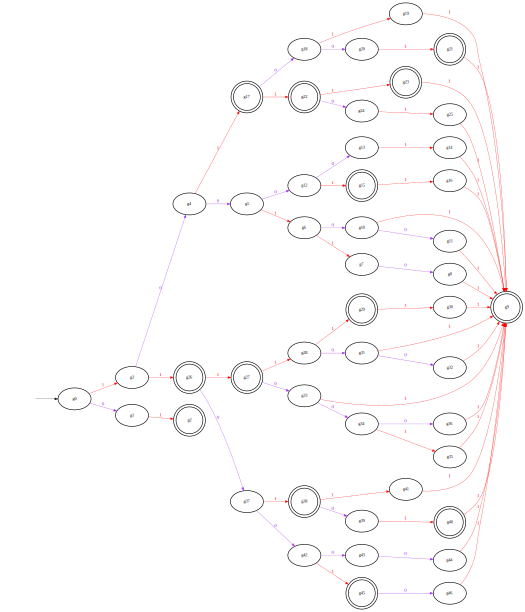

In [82]:
print("\n[+] deterministic DFA 7 bits sieve")

dfa_seven_sieve = nfda_seven_sieve.get_deterministic()
graphviz.Source(dfa_seven_sieve.build_dot())


[+] minimal DFA 7 bits sieve


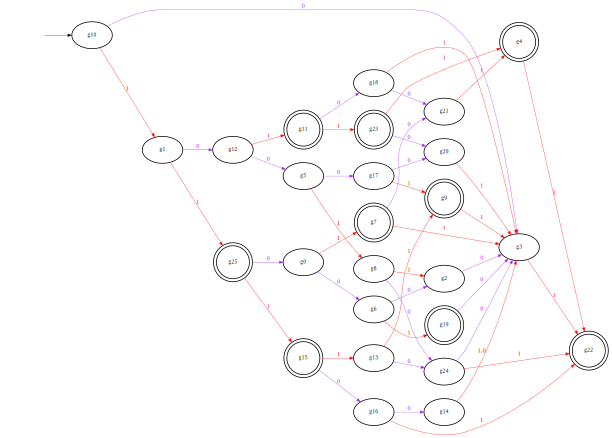

In [83]:
print("\n[+] minimal DFA 7 bits sieve")

minimal_seven_sieve = dfa_seven_sieve.minimal()
graphviz.Source(minimal_seven_sieve.build_dot())

Let's do some testing and get a grammar to generate 7 $bits$ primes to make sure everything is good.

In [84]:
seven_bits_sieve_grammar = Grammar.build_from_finite_automata(minimal_seven_sieve)

print("\n[+] prime generation")
for each in seven_bits_sieve_grammar.enumerate(length=7):
    print(int(each[::-1], 2), end=' ')
print()

for i in range(2, 2**7):
    accepted = minimal_seven_sieve.read(get_binary_input(i))
    if i in sieve:
        assert accepted
    else:
        assert not accepted


[+] prime generation
79 48 7 72 88 71 118 123 92 117 41 4 65 58 14 60 64 124 82 43 120 101 76 34 10 22 59 26 30 103 12 122 68 121 83 109 95 20 16 107 126 17 74 31 56 102 61 69 27 18 98 85 84 36 50 116 42 9 13 108 46 78 38 111 57 24 112 5 106 52 19 100 28 96 39 25 90 62 32 35 66 8 67 3 110 113 104 127 89 47 29 44 114 54 33 86 125 6 51 70 23 75 49 73 37 80 2 63 91 40 53 11 94 97 


Indeed it is. We can compare the number of states and transitions for each automata.

In [85]:
def automata_info(name, fa: Automata):
    print("[+]", name, "states =", len(fa.transition.states))
    print("[+]", name, "final states =", len(fa.final))
    delta_function = fa.transition.transitions
    transitions = sum([len(delta_function[state]) for state in delta_function])
    print("[+]", name, "transitions =", transitions)
    print()

automata_info("NDFA 7 bits sieve", nfda_seven_sieve)
automata_info("DFA 7 bits sieve", dfa_seven_sieve)
automata_info("minimal DFA 7 bits sieve", minimal_seven_sieve)

[+] NDFA 7 bits sieve states = 144
[+] NDFA 7 bits sieve final states = 3
[+] NDFA 7 bits sieve transitions = 171

[+] DFA 7 bits sieve states = 47
[+] DFA 7 bits sieve final states = 13
[+] DFA 7 bits sieve transitions = 64

[+] minimal DFA 7 bits sieve states = 26
[+] minimal DFA 7 bits sieve final states = 9
[+] minimal DFA 7 bits sieve transitions = 43



The NDFA-DFA conversion / minimization process is working as a compression mechanism
to encode the prime numbers up to a given $n \in \mathbb{N}$.

Regardless of how amusing might be to encode primes in this way, it would be interesting
to see how efficient the encoding is. Let's push it forward and create a sieve up to $2^{16}$ for that.
The NDFA-DFA / minimization should be done in batches for a better scaling of the algorithms.

Before that, let's change the "NDFA-DFA / minimization process" name to a more descriptive one.
From now on, I'll call it "the learning process", which is an universal process where the number
of states of the automata is minimized without losing its correctness and the transitions are reorganized
to support this new structure.

Like neural networks, this shows how powerful this type of architectures are when learning patterns in data.

As an example, take a look at what happens with even numbers, those with the least significant digit
equal to 0. They go through a state such that, if the next digit is not 1, the string is not accepted. In
other words, the automata learned that even numbers $>2$ are not primes, and is discarding them after
2 transitions. This is an emergent behavior which also reminds me to some characteristic
of decision trees.

In [86]:
import pickle
import os.path

def fda_batch_update(max_value = 2**12):
    # primes per batch
    batch_size = 750

    initial_state = State("ie0")
    final_state = State("ip0")

    builder = PrimeBuilder(final_state=final_state)

    transition = FADelta()
    final_set = {prime_state}

    runs = int(max_value / batch_size) + 1
    print("[+] total runs", runs)

    for j in range(0, runs):
        lower = j * batch_size + 1
        limit = min((j + 1) * batch_size, max_value + 1)

        print("[+] running batch", j, "between", lower, limit, "...")
        builder.build(initial_state, transition, lower, limit)

        # get NDFA and minimize it
        nfsm = FiniteAutomata(transition=transition, initial=initial_state, final=final_set)
        minimal = nfsm.minimal()

        # update final states
        final_set = minimal.final
        final_set.add(prime_state)

        # recover initial state
        initial_state = minimal.initial

        # get previous transition function
        transition = minimal.transition

    return minimal

sixteen_sieve_file = "sixteen_sieve_minimal.pkl"
max_sieve_value = 2**16

if os.path.isfile(sixteen_sieve_file):
    print("[+] loading", sixteen_sieve_file)
    sixteen_sieve = pickle.load(open(sixteen_sieve_file, "rb"))

else:
    sixteen_sieve = fda_batch_update(max_value=max_sieve_value)
    pickle.dump(sixteen_sieve, open(sixteen_sieve_file, "wb"))

automata_info("minimal DFA 16 bits sieve", sixteen_sieve)

for i in range(2, max_sieve_value):
    accepted = sixteen_sieve.read(get_binary_input(i))
    if i in sieve:
        assert accepted
    else:
        assert not accepted

[+] loading sixteen_sieve_minimal.pkl
[+] minimal DFA 16 bits sieve states = 3084
[+] minimal DFA 16 bits sieve final states = 516
[+] minimal DFA 16 bits sieve transitions = 5966



So for the 16 $bits$ sieve we got around $3000$ states and almost double of transitions. As a reference, the
amount of primes up to $2^{16}$ is $6542$.

How should we encode the automata to use the less space possible? First of all, we need to encode which of the
states are final, so that would require a 3000 $bits$ array, where we mark with 1 the final states and with 0 the
rest and additional 3000 $bits$ to indicate how much nodes actually are.

What we can do is to index each node and store a binary array $[s_{00}s_{01},\:s_{10}s_{11},\:... ,\:s_{n0}s_{n1}]$
where $s_{i0}$ is the index of the left child of $s_i$ and $s_{i1}$ is the right child (and any of them could be null).

Since (in this case) we have $3000$ states, we'll need $12$ $bits$ to encode each index, and since each state has
at most $2$ children, we would need $24 \times 3000 \; bits + 6000 \; bits = 78000\;bits$ (give or take).

This could be improved, since some states might have multiple predecessors. Something
like [Huffman Coding](https://en.wikipedia.org/wiki/Huffman_coding) can be useful to save some space. The nodes
which have more than one predecessors will be encoded with the shortest binary strings.

For the sake of completeness, let's write a Huffman encoding algorithm for the automata to evaluate it for
this case.

In [87]:
import networkx
import queue
import sys

from networkx.drawing.nx_agraph import graphviz_layout

sys.setrecursionlimit(10000)

# this function will make an array with states and its children (i.e. transition function)
def get_serialized_array_from_fda(fda: FiniteAutomata):
    def get_state_type(s):
        if s in fda.final:
            return "final"
        elif s == fda.initial:
            return "initial"
        else:
            return "none"

    transition_array = list()

    for state in fda.g.nodes:
        assert len(fda.g[state]) <= 2
        children = fda.g[state]
        symbol_transition = {children[s]["symbol"][0]:s for s in children}
        transition_array += [str(symbol_transition[sym]) if sym in symbol_transition else "null" for sym in ['0', '1'] ]

    return transition_array

print("[+] transition array for 7 bits sieve", get_serialized_array_from_fda(minimal_seven_sieve))

[+] transition array for 7 bits sieve ['g3', 'g1', 'null', 'g4', 'g20', 'g4', 'null', 'g22', 'g24', 'g9', 'g24', 'g2', 'g3', 'null', 'g0', 'g15', 'g12', 'g25', 'null', 'g22', 'g5', 'g11', 'g18', 'g23', 'null', 'g3', 'g6', 'g7', 'g16', 'g13', 'g3', 'null', 'g3', 'g22', 'null', 'g3', 'g21', 'g3', 'null', 'g3', 'g20', 'g9', 'null', 'null', 'g21', 'g3', 'g17', 'g8', 'g2', 'g19', 'g14', 'g22']


The serialized format is as follow : $(s_{i0}, s_{i1})$, where one of the states could be nulled. Now we can
transform this serialized automata into a Huffman coding scheme.

In [88]:
def automata_huffman_tree(transition_array, priority_queue=None, tree=None):
    def is_single_state(s):
        return '|' not in s

    if priority_queue is None:
        priority_queue = queue.PriorityQueue()
        [priority_queue.put((c, s)) for s, c in {s: transition_array.count(s) for s in transition_array}.items()]

        tree = networkx.DiGraph()

    if priority_queue.qsize() > 1:
        left = priority_queue.get()
        right = priority_queue.get()

        # parent
        parent = left[1] + "|" + right[1]
        tree.add_node(parent)

        # children
        if is_single_state(left[1]):
            tree.add_node(left[1], state=left[1])
        else:
            tree.add_node(left[1])

        if is_single_state(right[1]):
            tree.add_node(right[1], state=right[1])
        else:
            tree.add_node(right[1])

        ## add symbols
        tree.add_edge(parent, left[1], symbol='0')
        tree.add_edge(parent, right[1], symbol='1')

        priority_queue.put((left[0] + right[0], parent))
        return automata_huffman_tree(transition_array, priority_queue, tree)

    else:
        return tree

def plot_tree(tree):
    edges_labels = networkx.get_edge_attributes(tree, "symbol")
    node_labels = networkx.get_node_attributes(tree, "state")
    pos = graphviz_layout(tree, prog="dot")

    networkx.draw(tree, pos=pos, labels=node_labels)
    networkx.draw_networkx_edge_labels(tree, pos, edges_labels)

def get_root_node(tree):
    return next(iter(networkx.topological_sort(tree)))

def automata_huffman_code(huffman_tree, node=None, huffman_code=None, stack=None):
    is_root = False

    if huffman_code is None:
        node = get_root_node(huffman_tree)
        huffman_code = dict()
        stack = list()

        is_root = True

    children = huffman_tree[node]
    if len(children):
        for child in children:
            child_stack = stack + [children[child]["symbol"]]
            automata_huffman_code(huffman_tree, child, huffman_code, child_stack)

    if "state" in huffman_tree.nodes[node]:
        huffman_code[huffman_tree.nodes[node]["state"]] = ''.join(stack)

    if is_root:
        return huffman_code

sixteen_serialized_array = get_serialized_array_from_fda(sixteen_sieve)
sixteen_sieve_huffman_tree = automata_huffman_tree(sixteen_serialized_array)
huffman_code_sixteen_sieve = automata_huffman_code(sixteen_sieve_huffman_tree)

binary_serialization = ''.join([huffman_code_sixteen_sieve[s] for s in sixteen_serialized_array])
print("[+] compressed binary string (Huffman)", len(binary_serialization) + 6000, "bits")

[+] compressed binary string (Huffman) 68782 bits


There is no much gain as expected, since most of the nodes have only 1 predecessor and very few have a high
frequency in the serialized string. In fact, this is almost like encoding primes as a big binary string and
tagging prime numbers with "1" digits and composites with "0". For that case we would have $65536$ $bits$
and can be further improved by half eliminating even numbers (and a bit more taking out multiples
of higher primes). But as we'll see in a while, having the primes encoded in a graph has the advantage that we can
work with simple binary operations for different purposes at the same time we transverse it.

My guess is that this encoding can be improved using a graph transversal pattern by which
state duplication can be avoided by exploiting the binary-tree-like structure the graph has in some of its
parts. Maybe something to revisit later.

## On The Search of Autonomy

As you might noted, we have been using an external sieve to enumerate primes and use it as a feed to the
construction of the automata. That means the building process is not self-contained and will have the same
limitations than the sieve we are using.

But this is not strictly necessary, because given a $PSA(n)$ that encodes the primes up to $n$ within
its structure, already has all the information needed to determine if $n + 1$ is a prime number or not.
Even more, the $PSA(n)$ can be used as a primality test for all natural numbers between $n$ and $n^2$.

And this open room for parallelization, since several automatas can be built in parallel for numbers
between $n$ and $n^2$ using the $PSA(n)$, and eventually merge all of them as part of
the learning process to obtain $PSA(n^2)$. This process can go on forever.

What we need to find is al algorithm that, given a binary representation of a natural number $m$ within
$n$ and $n^2$, it should find if there is a prime factor within the $PSA(n)$. If not, $m$ is a prime
and additional states and transitions should be added to $PSA(n)$ to incorporate it.

If natural numbers were molecules, prime numbers are atoms. In the same way that different
combinations of atoms give rise to a plethora of molecules, every natural number can be written as a
product of prime numbers.

The integration of a new prime to the structure of a $PSA$ is analogous to the incorporation of
a new atom in a biological machine. New connections (molecules) can be made, which are going to increase
the number of states (configurations) in the [machine](https://www.youtube.com/watch?v=aDaOgu2CQtI).

### Primality test

A possible strategy would be to transverse the graph using a breadth-first search to iterate through all
nodes that are a final state. The path to those nodes are the binary representation of a prime number and
we need to check if the input binary string ($n$) is divisible by any of them. If not, and we checked for
all primes smaller than $\sqrt n$, then $n$ is prime.

Since is a breadth-first search we'll perform the search starting with the smallest primes first. In this
way, we'll discard multiples of 2 and 3 and 5 pretty quickly.

Given two natural numbers $n$ and $m$ we would like to know if $n$ is divisible by $m$. In other
words, we should check whether $n \equiv 0 \; mod\;m$ or not. The following driver takes a $PSA(n)$
and uses it as a primality test and dynamically encodes new primes on it between a given range. The driver
if only doing additions, modulus and power by 2 operations and uses a queue and a set.

In [89]:
class PrimeSieve:
    def __init__(self, fda, n):
        # PSA(n)
        self.automata = fda
        self.n = n

class StatePointer:
    def __init__(self, power, register, state):
        self.power, self.register, self.state = power, register, state

class DriverBuilder:
    def __init__(self, primes):
        # automata states
        self.counter = 0
        self.initial_state = State("is0")
        self.final_state = State("ip0")

        # prime numbers
        self.primes = primes

    def get_new_state(self):
        self.counter += 1
        return State("zp" + str(self.counter))

    def state_factorization(self, transition, prime):
        stack, state = get_binary_input(prime), self.initial_state
        for ic, b in enumerate(stack):
            current_state = self.get_new_state()

            if ic == 0:
                transition.add(state, current_state, b)
            elif ic == len(stack) - 1:
                transition.add(state, self.final_state, b)
            else:
                transition.add(state, current_state, b)

            state = current_state

    def build(self):
        transition = FADelta()

        for pp in self.primes:
            self.state_factorization(transition, pp)

        return FiniteAutomata(initial=self.initial_state, final={self.final_state},
                              transition=transition).minimal()

class PrimeSieveDriver:
    def __init__(self, psa: PrimeSieve, low, high):
        # PSA(n)
        self.psa = psa
        self.delta = self.psa.automata.transition.delta

        # limits
        self.low = low
        self.high = high

        # flow of natural numbers (initially all numbers are here, and composite are removed)
        self.primes = set(range(low, high + 1))

        # FDA
        self.fda = None

    def get_next_state(self, source, s):
        return next(iter(self.delta[source][s]))

    def run(self):
        # initialize queue
        node_queue = queue.Queue()
        node_queue.put(StatePointer(power=0, register=0, state=self.psa.automata.initial))

        # prime and current power
        while node_queue.qsize():
            # get node
            queue_state = node_queue.get()

            # check if we are in a final state
            if queue_state.state in self.psa.automata.final:
                # this is a prime number
                for p in filter(lambda m: m in self.primes, range(self.low, self.high + 1)):
                    if p % queue_state.register == 0:
                        self.primes.remove(p)

            # transverse
            if queue_state.state in self.delta:
                for symbol in self.delta[queue_state.state]:
                    # get digit
                    child = self.get_next_state(queue_state.state, symbol)
                    digit = int(symbol)

                    # get current values
                    power, register = queue_state.power, queue_state.register

                    # visit new child
                    if digit:
                        node_queue.put(StatePointer(power=power + 1, register=2**power + register, state=child))
                    else:
                        node_queue.put(StatePointer(power=power + 1, register=register, state=child))


        builder = DriverBuilder(primes=self.primes)
        self.fda = builder.build()

def merge_automatas(one, other):
    merged_delta = copy.deepcopy(one.transition)
    base = one.transition.max_state().number + 1

    other_delta = other.transition
    final_states = one.final
    for state in other_delta.transitions:
        for transition in other_delta.transitions[state]:
            source, target = transition.source, transition.target

            # propagate transition
            new_transition = copy.deepcopy(transition)
            new_transition.source = State(source.prefix + str(source.number + base))
            new_transition.target = State(target.prefix + str(target.number + base))

            # get final states
            if source in other.final:
                final_states.add(new_transition.source)

            if target in other.final:
                final_states.add(new_transition.target)

            # special case for the initial transition
            if state == other.initial:
                new_transition.source = one.initial

            merged_delta.add_transition(new_transition)

    return FiniteAutomata(initial=one.initial, final=final_states, transition=merged_delta)

As an example easy to visualize, let's use the driver using the $PSA(n=11)$ we built before to obtain the set
of primes between 12 and 121.

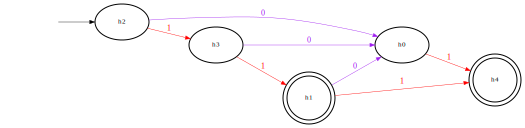

In [90]:
graphviz.Source(minimal_eleven_sieve.build_dot())

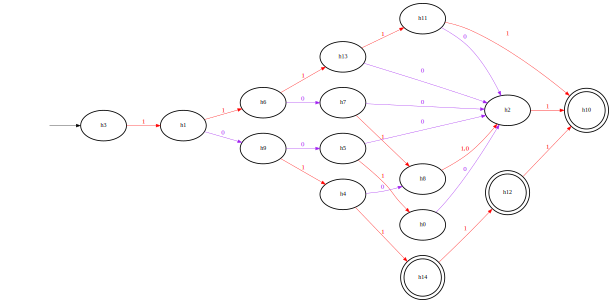

In [91]:
initial_sieve = PrimeSieve(fda=minimal_eleven_sieve, n=11)

prime_sieve_a = PrimeSieveDriver(initial_sieve, 12, 66)
prime_sieve_b = PrimeSieveDriver(initial_sieve, 67, 121)

prime_sieve_a.run()
prime_sieve_b.run()

graphviz.Source(prime_sieve_a.fda.build_dot())

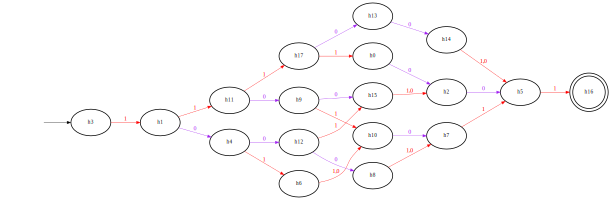

In [92]:
graphviz.Source(prime_sieve_b.fda.build_dot())

As is shown below, the automata is a NDFA since there are 2 transitions with the same symbol at the initial state.
Before applying a learning step on it, we should check it actually encodes all primes between 12 and 121.

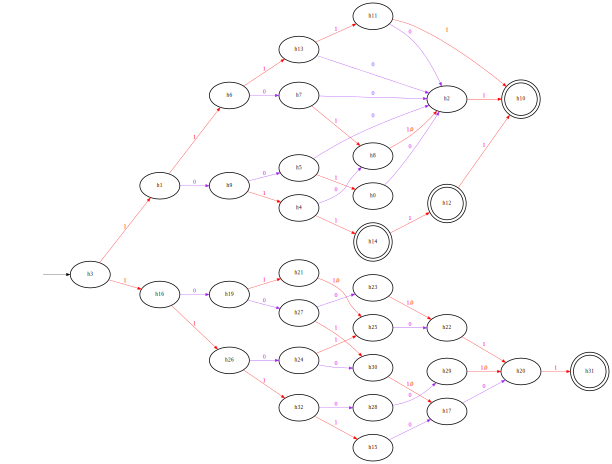

In [93]:
merged_prime_sieve_ab = merge_automatas(prime_sieve_a.fda, prime_sieve_b.fda)

graphviz.Source(merged_prime_sieve_ab.build_dot())

In [94]:
for i in range(12, 121):
    accepted = merged_prime_sieve_ab.read(get_binary_input(i))
    if i in sieve:
        assert accepted
    else:
        assert not accepted

Finally we can apply a learning step into the merged automata from above, and merge it to the initial $PSA(n)$
and we obtain the following NDFA.

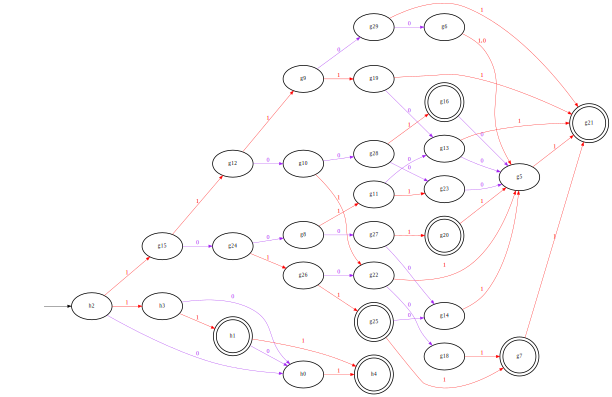

In [95]:
nfda_prime_sieve_121 = merge_automatas(minimal_eleven_sieve, merged_prime_sieve_ab.minimal())

graphviz.Source(nfda_prime_sieve_121.build_dot())

We can further minimize it, and get the minimal prime sieve for primes up to 121.

[+] PSA(121) states = 26
[+] PSA(121) final states = 9
[+] PSA(121) transitions = 43

[+] PSA(128) states = 26
[+] PSA(128) final states = 9
[+] PSA(128) transitions = 43



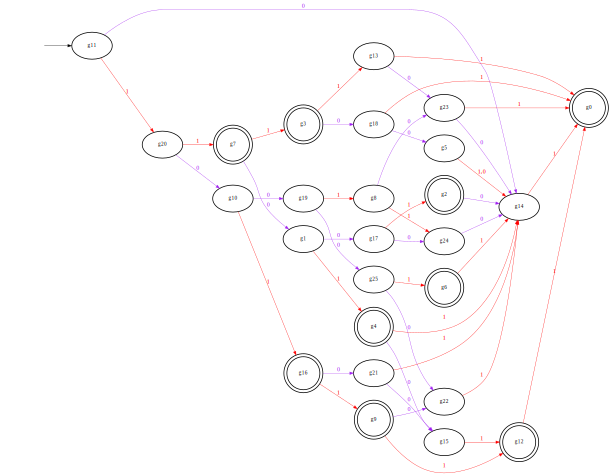

In [96]:
minimal_prime_sieve_121 = nfda_prime_sieve_121.minimal()

for i in range(2, 121):
    accepted = minimal_prime_sieve_121.read(get_binary_input(i))
    if i in sieve:
        assert accepted
    else:
        assert not accepted

automata_info("PSA(121)", minimal_prime_sieve_121)
automata_info("PSA(128)", minimal_prime_sieve_121)

graphviz.Source(minimal_prime_sieve_121.build_dot())

## Interlude

### Mersenne primes

Once a $PSA(n)$ is built, we can use different graph traversal strategies to find prime numbers of interest. For
example, from the $PSA(2^{16})$ we could enumerate all [Mersenne primes](https://en.wikipedia.org/wiki/Mersenne_prime)
of $16 bits$.

In [97]:
def mersenne_path(psa: FiniteAutomata):
        def get_next_state(source, s):
            return next(iter(psa.transition.delta[source][s]))

        # initialize queue
        node_queue = queue.Queue()
        node_queue.put(StatePointer(power=0, register=0, state=psa.initial))

        # mersenne primes stack
        mersenne = list()

        # prime and current power
        while node_queue.qsize():
            # get node
            queue_state = node_queue.get()

            # check if we are in a final state
            if queue_state.state in psa.final:
                # this is a prime number
                mersenne.append(queue_state.register)

            # transverse
            if queue_state.state in psa.transition.delta and \
                    '1' in psa.transition.delta[queue_state.state]:
                # get current values
                power, register = queue_state.power, queue_state.register

                # visit new child
                node_queue.put(StatePointer(power=power + 1, register=2**power + register,
                                            state=get_next_state(queue_state.state, '1')))

        return mersenne

print("[+] Mersenne primes (16 bits) :", mersenne_path(sixteen_sieve))

[+] Mersenne primes (16 bits) : [3, 7, 31, 127, 8191]


### Twin Primes

We all like twins, and specially when are primes. The following is a transversal strategy to enumerate them.

In [98]:
class TwinStack:
    def __init__(self, psa):
        # PSA(n)
        self.psa = psa

        # initial initial node for each twin path
        self.first, self.power, self.register = 0, 1, 1
        self.first_twin = self.get_next_state(self.psa.initial, '1')
        self.second_twin = self.get_next_state(self.psa.initial, '1')

        # twins primes stack
        self.primes = {(3, 5)}

    def get_next_state(self, source, s):
        return next(iter(self.psa.transition.delta[source][s]))

    def run(self):
        first_twin = self.get_next_state(self.first_twin, '0')
        second_twin = self.get_next_state(self.second_twin, '1')

        # initialize queue
        first_twin_queue = queue.Queue()
        second_twin_queue = queue.Queue()

        # flip flop
        first_twin_queue.put(StatePointer(power=self.power + 1, register=self.register, state=first_twin))
        second_twin_queue.put(StatePointer(power=self.power + 1, register=1 + (2**self.power), state=second_twin))

        while first_twin_queue.qsize() and second_twin_queue.qsize():
            # get node
            first_ptr = first_twin_queue.get()
            second_ptr = second_twin_queue.get()

            # check if we are in a final state
            if first_ptr.state in self.psa.final and second_ptr.state in self.psa.final:
                # this is a pair of twins
                if abs(first_ptr.register - second_ptr.register) == 2:
                    self.primes.add((min(first_ptr.register, second_ptr.register),
                                    max(first_ptr.register, second_ptr.register)))

            # transverse
            if first_ptr.state in self.psa.transition.delta and second_ptr.state in self.psa.transition.delta:

                # transverse
                for symbol in ['0', '1']:
                    if symbol in self.psa.transition.delta[first_ptr.state] and \
                            symbol in self.psa.transition.delta[second_ptr.state]:

                        # visit new child
                        if symbol is '1':
                            first_twin_queue.put(StatePointer(power=first_ptr.power + 1,
                                                              register=2**first_ptr.power + first_ptr.register,
                                                              state=self.get_next_state(first_ptr.state, '1')))
                        else:
                            first_twin_queue.put(StatePointer(power=first_ptr.power + 1,
                                                              register=first_ptr.register,
                                                              state=self.get_next_state(first_ptr.state, '0')))

                        if symbol is '1':
                            second_twin_queue.put(StatePointer(power=second_ptr.power + 1,
                                                               register=2**second_ptr.power + second_ptr.register,
                                                               state=self.get_next_state(second_ptr.state, '1')))
                        else:
                            second_twin_queue.put(StatePointer(power=second_ptr.power + 1,
                                                               register=second_ptr.register,
                                                               state=self.get_next_state(second_ptr.state, '0')))


        try:
            self.first_twin = self.get_next_state(self.first_twin, '1')
            self.second_twin = self.get_next_state(self.second_twin, '0')

            # move pointer
            self.register += 2**self.power
            self.power += 1

            self.run()
        except KeyError:
            return


twins_stack = TwinStack(psa=sixteen_sieve)
twins_stack.run()

for each in sorted(twins_stack.primes, key=lambda p: p[0]):
    print(each, end=' ')
print()

print("[+] total twin primes of 16 bits", len(twins_stack.primes))

(3, 5) (5, 7) (11, 13) (17, 19) (29, 31) (41, 43) (59, 61) (71, 73) (101, 103) (107, 109) (137, 139) (149, 151) (179, 181) (191, 193) (197, 199) (227, 229) (239, 241) (269, 271) (281, 283) (311, 313) (347, 349) (419, 421) (431, 433) (461, 463) (521, 523) (569, 571) (599, 601) (617, 619) (641, 643) (659, 661) (809, 811) (821, 823) (827, 829) (857, 859) (881, 883) (1019, 1021) (1031, 1033) (1049, 1051) (1061, 1063) (1091, 1093) (1151, 1153) (1229, 1231) (1277, 1279) (1289, 1291) (1301, 1303) (1319, 1321) (1427, 1429) (1451, 1453) (1481, 1483) (1487, 1489) (1607, 1609) (1619, 1621) (1667, 1669) (1697, 1699) (1721, 1723) (1787, 1789) (1871, 1873) (1877, 1879) (1931, 1933) (1949, 1951) (1997, 1999) (2027, 2029) (2081, 2083) (2087, 2089) (2111, 2113) (2129, 2131) (2141, 2143) (2237, 2239) (2267, 2269) (2309, 2311) (2339, 2341) (2381, 2383) (2549, 2551) (2591, 2593) (2657, 2659) (2687, 2689) (2711, 2713) (2729, 2731) (2789, 2791) (2801, 2803) (2969, 2971) (2999, 3001) (3119, 3121) (3167, 3169

In [99]:
# taken from https://primes.utm.edu/lists/small/100ktwins.txt
twins_out_there = """
        3        5       11       17       29       41       59       71
      101      107      137      149      179      191      197      227
      239      269      281      311      347      419      431      461
      521      569      599      617      641      659      809      821
      827      857      881     1019     1031     1049     1061     1091
     1151     1229     1277     1289     1301     1319     1427     1451
     1481     1487     1607     1619     1667     1697     1721     1787
     1871     1877     1931     1949     1997     2027     2081     2087
     2111     2129     2141     2237     2267     2309     2339     2381
     2549     2591     2657     2687     2711     2729     2789     2801
     2969     2999     3119     3167     3251     3257     3299     3329
     3359     3371     3389     3461     3467     3527     3539     3557
     3581     3671     3767     3821     3851     3917     3929     4001
     4019     4049     4091     4127     4157     4217     4229     4241
     4259     4271     4337     4421     4481     4517     4547     4637
     4649     4721     4787     4799     4931     4967     5009     5021
     5099     5231     5279     5417     5441     5477     5501     5519
     5639     5651     5657     5741     5849     5867     5879     6089
     6131     6197     6269     6299     6359     6449     6551     6569
     6659     6689     6701     6761     6779     6791     6827     6869
     6947     6959     7127     7211     7307     7331     7349     7457
     7487     7547     7559     7589     7757     7877     7949     8009
     8087     8219     8231     8291     8387     8429     8537     8597
     8627     8819     8837     8861     8969     8999     9011     9041
     9239     9281     9341     9419     9431     9437     9461     9629
     9677     9719     9767     9857     9929    10007    10037    10067
    10091    10139    10271    10301    10331    10427    10457    10499
    10529    10709    10859    10889    10937    11057    11069    11117
    11159    11171    11351    11489    11549    11699    11717    11777
    11831    11939    11969    12041    12071    12107    12161    12239
    12251    12377    12539    12611    12821    12917    13001    13007
    13217    13337    13397    13679    13691    13709    13721    13757
    13829    13877    13901    13931    13997    14009    14081    14249
    14321    14387    14447    14549    14561    14591    14627    14867
    15137    15269    15287    15329    15359    15581    15641    15647
    15731    15737    15887    15971    16061    16067    16139    16187
    16229    16361    16451    16631    16649    16691    16829    16901
    16979    17027    17189    17207    17291    17387    17417    17489
    17579    17597    17657    17681    17747    17789    17837    17909
    17921    17957    17987    18041    18047    18059    18119    18131
    18251    18287    18311    18521    18539    18911    18917    19079
    19139    19181    19211    19379    19421    19427    19469    19541
    19697    19751    19841    19889    19961    19991    20021    20147
    20231    20357    20441    20477    20507    20549    20639    20717
    20747    20771    20807    20897    20981    21011    21017    21059
    21191    21317    21377    21491    21521    21557    21587    21599
    21611    21647    21737    21839    22037    22091    22109    22157
    22271    22277    22367    22481    22541    22571    22619    22637
    22697    22739    22859    22961    23027    23039    23057    23201
    23291    23369    23537    23561    23627    23669    23687    23741
    23831    23909    24107    24179    24371    24419    24917    24977
    25031    25169    25301    25307    25409    25469    25577    25601
    25799    25847    25931    25997    26111    26249    26261    26681
    26699    26711    26729    26861    26879    26891    26951    27059
    27107    27239    27281    27407    27479    27527    27539    27581
    27689    27737    27749    27791    27917    27941    28097    28109
    28181    28277    28307    28349    28409    28547    28571    28619
    28661    28751    29021    29129    29207    29387    29399    29567
    29669    29759    29879    30011    30089    30137    30269    30389
    30467    30491    30557    30839    30851    30869    31079    31121
    31151    31181    31247    31319    31391    31511    31541    31721
    31727    31769    31847    32027    32057    32117    32141    32189
    32297    32321    32369    32411    32441    32531    32561    32609
    32717    32801    32831    32909    32939    32969    33071    33149
    33179    33287    33329    33347    33587    33599    33617    33749
    33767    33809    33827    34031    34127    34157    34211    34259
    34301    34367    34469    34499    34511    34589    34649    34757
    34841    34847    34961    35051    35081    35279    35447    35507
    35531    35591    35729    35801    35837    35897    36011    36107
    36341    36467    36527    36779    36791    36899    36929    37019
    37199    37307    37337    37361    37547    37571    37589    37691
    37781    37811    37991    38237    38327    38447    38459    38567
    38609    38651    38669    38711    38747    38921    39041    39161
    39227    39239    39341    39371    39509    39827    39839    40037
    40127    40151    40427    40529    40637    40697    40847    41141
    41177    41201    41231    41387    41411    41519    41609    41759
    41849    41957    41981    42017    42071    42179    42221    42281
    42407    42461    42569    42641    42701    42839    42899    43049
    43319    43397    43541    43577    43607    43649    43781    43787
    43889    43961    44027    44087    44129    44201    44267    44279
    44381    44531    44621    44699    44771    45119    45137    45179
    45317    45341    45587    45821    46049    46091    46181    46271
    46307    46349    46439    46589    46679    46769    46817    46829
    47057    47147    47351    47387    47417    47657    47699    47711
    47741    47777    47807    48119    48311    48407    48479    48539
    48647    48677    48731    48779    48821    48857    48869    48989
    49031    49121    49169    49199    49277    49331    49367    49391
    49409    49529    49547    49667    49739    49787    49919    49937
    49991    50021    50051    50129    50261    50459    50549    50591
    50891    50969    51059    51131    51197    51239    51341    51347
    51419    51437    51479    51719    51767    51827    51869    51971
    52067    52181    52289    52361    52541    52709    52859    52901
    53087    53147    53171    53231    53267    53279    53549    53591
    53609    53717    53897    54011    54401    54419    54497    54539
    54581    54629    54917    55049    55217    55331    55337    55439
    55619    55631    55661    55817    55901    55931    56039    56099
    56207    56237    56267    56477    56501    56531    56597    56711
    56807    56891    56909    56921    57191    57221    57269    57329
    57347    57527    57557    57791    57899    58109    58151    58169
    58229    58367    58391    58439    58451    58601    58787    58907
    59009    59021    59051    59207    59219    59357    59417    59441
    59471    59627    59669    60089    60101    60167    60257    60647
    60659    60761    60887    60899    60917    61151    61331    61379
    61469    61559    61979    62129    62141    62189    62297    62927
    62969    62981    62987    63029    63197    63311    63389    63419
    63587    63599    63647    63689    63839    64151    64187    64301
    64451    64577    64661    64781    64877    64919    65027    65099
    65171    65267    65447    65519    65537    65579    65699    65717
    65729    65837    65927    65981    66107    66359    66569    66749
    66851    66947    67139    67187    67211    67217    67271    67409
    67427    67577    67757    67931    68111    68207    68279    68447
    68489    68711    68819    68879    68897    69029    69149    69191
    69257    69401    69491    69497    69737    69761    69827    69857
"""

collected_twins = set(filter(lambda m: m < 2**16, [int(n) for n in twins_out_there.split()]))

for p in twins_stack.primes:
    if p[0] in collected_twins:
        collected_twins.remove(p[0])

assert len(collected_twins) == 0

As with twins, is always complex.

## Palindromic Primes

Another interesting set of numbers are palindromic primes (or how we use to call them, *symmetrical primes*).

In [100]:
def symmetrical_primes(psa: FiniteAutomata):
        def get_next_state(source, s):
            return next(iter(psa.transition.delta[source][s]))

        # initialize queue
        node_queue = queue.Queue()
        node_queue.put(StatePointer(power=0, register=list(), state=psa.initial))

        # mersenne primes stack
        symmetrical = list()

        # prime and current power
        while node_queue.qsize():
            # get node
            queue_state = node_queue.get()

            # check if we are in a final state
            if queue_state.state in psa.final:
                # this is a prime number
                if queue_state.register == queue_state.register[::-1]:
                    symmetrical.append(queue_state.register.copy())

            # transverse
            if queue_state.state in psa.transition.delta:
                # get current values
                power, register = queue_state.power, queue_state.register

                # visit new child
                if '1' in psa.transition.delta[queue_state.state]:
                    node_queue.put(StatePointer(power=power + 1, register=register + ['1'],
                                                state=get_next_state(queue_state.state, '1')))

                # visit new child
                if '0' in psa.transition.delta[queue_state.state]:
                    node_queue.put(StatePointer(power=power + 1, register=register + ['0'],
                                                state=get_next_state(queue_state.state, '0')))

        return symmetrical

for p in symmetrical_primes(sixteen_sieve):
    print(''.join(p) + " (" + str(int(''.join(p), 2)) + ")", end=' | ')

11 (3) | 111 (7) | 101 (5) | 11111 (31) | 10001 (17) | 1111111 (127) | 1101011 (107) | 1001001 (73) | 110111011 (443) | 100111001 (313) | 100000001 (257) | 11101010111 (1879) | 11100100111 (1831) | 11011111011 (1787) | 11001010011 (1619) | 11000100011 (1571) | 10110101101 (1453) | 10010101001 (1193) | 1111111111111 (8191) | 1111011101111 (7919) | 1111001001111 (7759) | 1110110110111 (7607) | 1101010101011 (6827) | 1100001000011 (6211) | 1011101011101 (5981) | 1011011101101 (5869) | 1010110110101 (5557) | 1010001000101 (5189) | 1001111111001 (5113) | 1001100011001 (4889) | 111101111101111 (31727) | 111100111001111 (31183) | 111011010110111 (30391) | 111001111100111 (29671) | 111000010000111 (28807) | 110111000111011 (28219) | 110110111011011 (28123) | 110110010011011 (27803) | 110101000101011 (27179) | 110010101010011 (25939) | 110010010010011 (25747) | 101110111011101 (24029) | 101110000011101 (23581) | 101100101001101 (22861) | 101100010001101 (22669) | 101100000001101 (22541) | 10100

On the sixties we use to generate a bunch of these for our satanic rituals with my friend MJ (who is also a prime).
This automata was very handy back then.

$\zeta$